<a href="https://colab.research.google.com/github/edyoda/AI-Agent-Development-and-GenAI/blob/main/Day_8_DeepDive_AutoGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit - https://microsoft.github.io/autogen/stable/index.html**

In [1]:
!pip install autogen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 734.2/734.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.5 MB/s eta 0:00:00


In [3]:
!pip install autogen-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 2.0 MB/s eta 0:00:00


In [4]:
import logging

from autogen_core import EVENT_LOGGER_NAME

logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(EVENT_LOGGER_NAME)
logger.addHandler(logging.StreamHandler())
logger.setLevel(logging.INFO)

In [35]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [7]:
!pip install autogen-ext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.9/259.9 kB 4.0 MB/s eta 0:00:00


In [8]:
from autogen_ext.models.openai import OpenAIChatCompletionClient

openai_model_client = OpenAIChatCompletionClient(
    model="gpt-4o-2024-08-06",
    api_key=os.environ['OPENAI_API_KEY']
)

In [9]:
from autogen_core.models import UserMessage

result = await openai_model_client.create([UserMessage(content="What is the capital of France?", source="user")])
print(result)
await openai_model_client.close()

{"type": "LLMCall", "messages": [{"name": "user", "role": "user", "content": "What is the capital of France?"}], "response": {"id": "chatcmpl-BLTK6NlW9gu329wzGDgTPOZOfS2F1", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "The capital of France is Paris.", "refusal": null, "role": "assistant", "annotations": [], "audio": null, "function_call": null, "tool_calls": null}}], "created": 1744457306, "model": "gpt-4o-2024-08-06", "object": "chat.completion", "service_tier": "default", "system_fingerprint": "fp_92f14e8683", "usage": {"completion_tokens": 8, "prompt_tokens": 15, "total_tokens": 23, "completion_tokens_details": {"accepted_prediction_tokens": 0, "audio_tokens": 0, "reasoning_tokens": 0, "rejected_prediction_tokens": 0}, "prompt_tokens_details": {"audio_tokens": 0, "cached_tokens": 0}}}, "prompt_tokens": 15, "completion_tokens": 8, "agent_id": null}
INFO:autogen_core.events:{"type": "LLMCall", "messages": [{"name": "user", "role": "user"

finish_reason='stop' content='The capital of France is Paris.' usage=RequestUsage(prompt_tokens=15, completion_tokens=8) cached=False logprobs=None thought=None


In [11]:
!pip install autogen-agentchat # Install autogen-agentchat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 2.3 MB/s eta 0:00:00


In [12]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Hello, world!", source="User")


In [15]:
from io import BytesIO

import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")

# Agents
AutoGen AgentChat provides a set of preset Agents, each with variations in how an agent might respond to messages. All agents share the following attributes and methods:

name: The unique name of the agent.

description: The description of the agent in text.

on_messages(): Send the agent a sequence of messages that subclass BaseChatMessage and get a Response. It is important to note that agents are expected to be stateful and this method is expected to be called with new messages, not the complete history.

on_messages_stream(): Same as on_messages() but returns an iterator of messages that subclass BaseAgentEvent or BaseChatMessage followed by a Response as the last item.

on_reset(): Reset the agent to its initial state.

run() and run_stream(): convenience methods that call on_messages() and on_messages_stream() respectively but offer the same interface as Teams.

See autogen_agentchat.messages for more information on AgentChat message types.



In [23]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import StructuredMessage, TextMessage
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient

In [24]:
# Define a tool that searches the web for information.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# Create an agent that uses the OpenAI GPT-4o model.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=os.environ['OPENAI_API_KEY']
)
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)


In [26]:
# Define a tool that searches the web for information.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# Create an agent that uses the OpenAI GPT-4o model.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    # api_key="YOUR_API_KEY",
)
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

In [27]:
async def assistant_run() -> None:
    response = await agent.on_messages(
        [TextMessage(content="Find information on AutoGen", source="user")],
        cancellation_token=CancellationToken(),
    )
    print(response.inner_messages)
    print(response.chat_message)


# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

{"type": "LLMCall", "messages": [{"content": "Use tools to solve tasks.", "role": "system"}, {"name": "user", "role": "user", "content": "Find information on AutoGen"}], "response": {"id": "chatcmpl-BLTe2ZzWKcZc4ouy7kHj3GZT2MdqP", "choices": [{"finish_reason": "tool_calls", "index": 0, "logprobs": null, "message": {"content": null, "refusal": null, "role": "assistant", "annotations": [], "audio": null, "function_call": null, "tool_calls": [{"id": "call_EkQjBwyGwShTHAPYupHlxIXY", "function": {"arguments": "{\"query\":\"AutoGen\"}", "name": "web_search"}, "type": "function"}]}}], "created": 1744458542, "model": "gpt-4o-2024-08-06", "object": "chat.completion", "service_tier": "default", "system_fingerprint": "fp_92f14e8683", "usage": {"completion_tokens": 16, "prompt_tokens": 61, "total_tokens": 77, "completion_tokens_details": {"accepted_prediction_tokens": 0, "audio_tokens": 0, "reasoning_tokens": 0, "rejected_prediction_tokens": 0}, "prompt_tokens_details": {"audio_tokens": 0, "cached

[ToolCallRequestEvent(source='assistant', models_usage=RequestUsage(prompt_tokens=61, completion_tokens=16), metadata={}, content=[FunctionCall(id='call_EkQjBwyGwShTHAPYupHlxIXY', arguments='{"query":"AutoGen"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='assistant', models_usage=None, metadata={}, content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_EkQjBwyGwShTHAPYupHlxIXY', is_error=False)], type='ToolCallExecutionEvent')]
source='assistant' models_usage=None metadata={} content='AutoGen is a programming framework for building multi-agent applications.' type='ToolCallSummaryMessage'



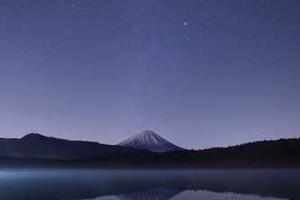

In [28]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

{"type": "LLMCall", "messages": [{"content": "Use tools to solve tasks.", "role": "system"}, {"name": "user", "role": "user", "content": "Find information on AutoGen"}, {"name": "assistant", "role": "assistant", "tool_calls": [{"id": "call_EkQjBwyGwShTHAPYupHlxIXY", "function": {"arguments": "{\"query\":\"AutoGen\"}", "name": "web_search"}, "type": "function"}]}, {"content": "AutoGen is a programming framework for building multi-agent applications.", "role": "tool", "tool_call_id": "call_EkQjBwyGwShTHAPYupHlxIXY"}, {"name": "user", "role": "user", "content": [{"type": "text", "text": "Can you describe the content of this image?"}, {"type": "image_url", "image_url": {"url": "", "detail": "auto"}}]}], "response": {"id": "chatcmpl-BLTh9hqDidqybgoSPwQWNzJ1U5cyV", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "The image shows a serene night scene featuring a mountain in the distance, possibly Mount Fuji, under a starry sky. The mountain is reflec
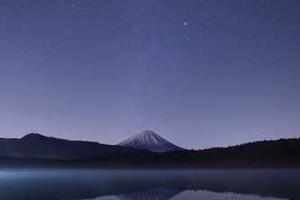
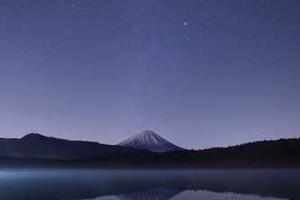

source='assistant' models_usage=RequestUsage(prompt_tokens=367, completion_tokens=52) metadata={} content='The image shows a serene night scene featuring a mountain in the distance, possibly Mount Fuji, under a starry sky. The mountain is reflected in a body of water in the foreground. The scene is tranquil and captures the beauty of nature at night.' type='TextMessage'


In [29]:
# Use asyncio.run(...) when running in a script.
response = await agent.on_messages([multi_modal_message], CancellationToken())
print(response.chat_message)

# Teams
In this section you’ll learn how to create a multi-agent team (or simply team) using AutoGen. A team is a group of agents that work together to achieve a common goal.

We’ll first show you how to create and run a team. We’ll then explain how to observe the team’s behavior, which is crucial for debugging and understanding the team’s performance, and common operations to control the team’s behavior.

AgentChat supports several team presets:

RoundRobinGroupChat: A team that runs a group chat with participants taking turns in a round-robin fashion

SelectorGroupChat: A team that selects the next speaker using a ChatCompletion model after each message.

MagenticOneGroupChat: A generalist multi-agent system for solving open-ended web and file-based tasks across a variety of domains.

**When should you use a team?**

Teams are for complex tasks that require collaboration and diverse expertise. However, they also demand more scaffolding to steer compared to single agents. While AutoGen simplifies the process of working with teams, start with a single agent for simpler tasks, and transition to a multi-agent team when a single agent proves inadequate. Ensure that you have optimized your single agent with the appropriate tools and instructions before moving to a team-based approach.

In [30]:
import asyncio

from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.base import TaskResult
from autogen_agentchat.conditions import ExternalTermination, TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient

# Create an OpenAI model client.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o-2024-08-06",
    api_key=os.environ['OPENAI_API_KEY']
)

# Create the primary agent.
primary_agent = AssistantAgent(
    "primary",
    model_client=model_client,
    system_message="You are a helpful AI assistant.",
)

# Create the critic agent.
critic_agent = AssistantAgent(
    "critic",
    model_client=model_client,
    system_message="Provide constructive feedback. Respond with 'APPROVE' to when your feedbacks are addressed.",
)

# Define a termination condition that stops the task if the critic approves.
text_termination = TextMentionTermination("APPROVE")

# Create a team with the primary and critic agents.
team = RoundRobinGroupChat([primary_agent, critic_agent], termination_condition=text_termination)


In [31]:
# Use `asyncio.run(...)` when running in a script.
result = await team.run(task="Write a short poem about the fall season.")
print(result)

{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_afa799fd-99c1-4d37-a1f4-85f4e0432735/afa799fd-99c1-4d37-a1f4-85f4e0432735", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
INFO:autogen_core.events:{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_afa799fd-99c1-4d37-a1f4-85f4e0432735/afa799fd-99c1-4d37-a1f4-85f4e0432735", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_afa799fd-99c1-4d37-a1f4-85f4e0432735/afa799fd-99c1-4d37-a1f4-85f4e0432735", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.DELIVER", "type": "Message"}
INFO:autogen_core.events:{"payloa

CancelledError: 

In [32]:
# Create a new team with an external termination condition.
external_termination = ExternalTermination()
team = RoundRobinGroupChat(
    [primary_agent, critic_agent],
    termination_condition=external_termination | text_termination,  # Use the bitwise OR operator to combine conditions.
)

# Run the team in a background task.
run = asyncio.create_task(Console(team.run_stream(task="Write a short poem about the fall season.")))

# Wait for some time.
await asyncio.sleep(0.1)

# Stop the team.
external_termination.set()

# Wait for the team to finish.
await run

{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_6a5b686a-8b9c-4669-b46e-f61c839c0f8a/6a5b686a-8b9c-4669-b46e-f61c839c0f8a", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
INFO:autogen_core.events:{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_6a5b686a-8b9c-4669-b46e-f61c839c0f8a/6a5b686a-8b9c-4669-b46e-f61c839c0f8a", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_6a5b686a-8b9c-4669-b46e-f61c839c0f8a/6a5b686a-8b9c-4669-b46e-f61c839c0f8a", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.DELIVER", "type": "Message"}
INFO:autogen_core.events:{"payloa

---------- user ----------
Write a short poem about the fall season.


{"type": "LLMCall", "messages": [{"content": "You are a helpful AI assistant.", "role": "system"}, {"name": "user", "role": "user", "content": "Write a short poem about the fall season."}, {"name": "primary", "role": "assistant", "content": "Leaves of amber gently fall,  \nWhispering the end of summer's call.  \nCrisp air paints the sky a clearer hue,  \nGolden vistas come into view.  \n\nPumpkins rest on garden beds,  \nAs harvest moonlight softly spreads.  \nSweaters wrapped in warmth and grace,  \nEcho autumn's gentle pace.  \n\nRustling winds play nature's tune,  \nWelcoming the silver moon.  \nIn autumn's fleeting, fiery dance,  \nWe find a quiet, sweet romance.  "}, {"name": "critic", "role": "user", "content": "Your poem beautifully captures the essence of the fall season, combining vivid imagery with a soothing rhythm. Here are a few suggestions to enhance it:\n\n1. **Imagery Expansion**: While your imagery is evocative, consider adding more specific and sensory details that en

---------- primary ----------


{"payload": "Message could not be serialized", "sender": "RoundRobinGroupChatManager_6a5b686a-8b9c-4669-b46e-f61c839c0f8a/6a5b686a-8b9c-4669-b46e-f61c839c0f8a", "receiver": "output_topic_6a5b686a-8b9c-4669-b46e-f61c839c0f8a/6a5b686a-8b9c-4669-b46e-f61c839c0f8a", "kind": "MessageKind.PUBLISH", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
INFO:autogen_core.events:{"payload": "Message could not be serialized", "sender": "RoundRobinGroupChatManager_6a5b686a-8b9c-4669-b46e-f61c839c0f8a/6a5b686a-8b9c-4669-b46e-f61c839c0f8a", "receiver": "output_topic_6a5b686a-8b9c-4669-b46e-f61c839c0f8a/6a5b686a-8b9c-4669-b46e-f61c839c0f8a", "kind": "MessageKind.PUBLISH", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}


Crimson leaves drift down like dreams,  
Whispering secrets to the streams.  
The chill in the air, a gentle nudge,  
Invites us all to slow and trudge.  

Cider warms the chilly air,  
Pumpkins glow with lantern's flare.  
Sweaters hug with soft embrace,  
As autumn leaves its golden trace.  

Fields of amber, skies of slate,  
Nature weaves her grand estate.  
In the harvest moon's soft light,  
Fall unfolds its rich delight.


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a short poem about the fall season.', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=594, completion_tokens=107), metadata={}, content="Crimson leaves drift down like dreams,  \nWhispering secrets to the streams.  \nThe chill in the air, a gentle nudge,  \nInvites us all to slow and trudge.  \n\nCider warms the chilly air,  \nPumpkins glow with lantern's flare.  \nSweaters hug with soft embrace,  \nAs autumn leaves its golden trace.  \n\nFields of amber, skies of slate,  \nNature weaves her grand estate.  \nIn the harvest moon's soft light,  \nFall unfolds its rich delight.", type='TextMessage')], stop_reason='External termination requested')

In [37]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.conditions import TextMessageTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient

model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key = os.environ['OPENAI_API_KEY'],
    parallel_tool_calls=False,  # type: ignore
)


# Create a tool for incrementing a number.
def increment_number(number: int) -> int:
    """Increment a number by 1."""
    return number + 1


# Create a tool agent that uses the increment_number function.
looped_assistant = AssistantAgent(
    "looped_assistant",
    model_client=model_client,
    tools=[increment_number],  # Register the tool.
    system_message="You are a helpful AI assistant, use the tool to increment the number.",
)

# Termination condition that stops the task if the agent responds with a text message.
termination_condition = TextMessageTermination("looped_assistant")

# Create a team with the looped assistant agent and the termination condition.
team = RoundRobinGroupChat(
    [looped_assistant],
    termination_condition=termination_condition,
)

# Run the team with a task and print the messages to the console.
async for message in team.run_stream(task="Increment the number 5 to 10."):  # type: ignore
    print(type(message).__name__, message)

await model_client.close()


{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_d2a5e072-3fb5-4d12-8a85-fd73f5d0629b/d2a5e072-3fb5-4d12-8a85-fd73f5d0629b", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
INFO:autogen_core.events:{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_d2a5e072-3fb5-4d12-8a85-fd73f5d0629b/d2a5e072-3fb5-4d12-8a85-fd73f5d0629b", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_d2a5e072-3fb5-4d12-8a85-fd73f5d0629b/d2a5e072-3fb5-4d12-8a85-fd73f5d0629b", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.DELIVER", "type": "Message"}
INFO:autogen_core.events:{"payloa

TextMessage source='user' models_usage=None metadata={} content='Increment the number 5 to 10.' type='TextMessage'


{"type": "LLMCall", "messages": [{"content": "You are a helpful AI assistant, use the tool to increment the number.", "role": "system"}, {"name": "user", "role": "user", "content": "Increment the number 5 to 10."}], "response": {"id": "chatcmpl-BLULN9TqU4JFhd9QsLt6h4M6fXjBL", "choices": [{"finish_reason": "tool_calls", "index": 0, "logprobs": null, "message": {"content": null, "refusal": null, "role": "assistant", "annotations": [], "audio": null, "function_call": null, "tool_calls": [{"id": "call_T9yuH6N7qWVB7uOvA5aaxsBP", "function": {"arguments": "{\"number\":5}", "name": "increment_number"}, "type": "function"}]}}], "created": 1744461229, "model": "gpt-4o-2024-08-06", "object": "chat.completion", "service_tier": "default", "system_fingerprint": "fp_85bc8e3fae", "usage": {"completion_tokens": 15, "prompt_tokens": 75, "total_tokens": 90, "completion_tokens_details": {"accepted_prediction_tokens": 0, "audio_tokens": 0, "reasoning_tokens": 0, "rejected_prediction_tokens": 0}, "prompt_t

ToolCallRequestEvent source='looped_assistant' models_usage=RequestUsage(prompt_tokens=75, completion_tokens=15) metadata={} content=[FunctionCall(id='call_T9yuH6N7qWVB7uOvA5aaxsBP', arguments='{"number":5}', name='increment_number')] type='ToolCallRequestEvent'
ToolCallExecutionEvent source='looped_assistant' models_usage=None metadata={} content=[FunctionExecutionResult(content='6', name='increment_number', call_id='call_T9yuH6N7qWVB7uOvA5aaxsBP', is_error=False)] type='ToolCallExecutionEvent'
ToolCallSummaryMessage source='looped_assistant' models_usage=None metadata={} content='6' type='ToolCallSummaryMessage'


{"type": "LLMCall", "messages": [{"content": "You are a helpful AI assistant, use the tool to increment the number.", "role": "system"}, {"name": "user", "role": "user", "content": "Increment the number 5 to 10."}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_T9yuH6N7qWVB7uOvA5aaxsBP", "function": {"arguments": "{\"number\":5}", "name": "increment_number"}, "type": "function"}]}, {"content": "6", "role": "tool", "tool_call_id": "call_T9yuH6N7qWVB7uOvA5aaxsBP"}], "response": {"id": "chatcmpl-BLULNbf15uN4M07s7PSVbDZChJ32Q", "choices": [{"finish_reason": "tool_calls", "index": 0, "logprobs": null, "message": {"content": null, "refusal": null, "role": "assistant", "annotations": [], "audio": null, "function_call": null, "tool_calls": [{"id": "call_YqhJCNczbMVcUhBGf4iuAQkF", "function": {"arguments": "{\"number\":6}", "name": "increment_number"}, "type": "function"}]}}], "created": 1744461229, "model": "gpt-4o-2024-08-06", "object": "chat.completion", "servi

ToolCallRequestEvent source='looped_assistant' models_usage=RequestUsage(prompt_tokens=103, completion_tokens=15) metadata={} content=[FunctionCall(id='call_YqhJCNczbMVcUhBGf4iuAQkF', arguments='{"number":6}', name='increment_number')] type='ToolCallRequestEvent'
ToolCallExecutionEvent source='looped_assistant' models_usage=None metadata={} content=[FunctionExecutionResult(content='7', name='increment_number', call_id='call_YqhJCNczbMVcUhBGf4iuAQkF', is_error=False)] type='ToolCallExecutionEvent'
ToolCallSummaryMessage source='looped_assistant' models_usage=None metadata={} content='7' type='ToolCallSummaryMessage'


{"type": "LLMCall", "messages": [{"content": "You are a helpful AI assistant, use the tool to increment the number.", "role": "system"}, {"name": "user", "role": "user", "content": "Increment the number 5 to 10."}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_T9yuH6N7qWVB7uOvA5aaxsBP", "function": {"arguments": "{\"number\":5}", "name": "increment_number"}, "type": "function"}]}, {"content": "6", "role": "tool", "tool_call_id": "call_T9yuH6N7qWVB7uOvA5aaxsBP"}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_YqhJCNczbMVcUhBGf4iuAQkF", "function": {"arguments": "{\"number\":6}", "name": "increment_number"}, "type": "function"}]}, {"content": "7", "role": "tool", "tool_call_id": "call_YqhJCNczbMVcUhBGf4iuAQkF"}], "response": {"id": "chatcmpl-BLULO93wXftlHav6zGWucRWpV37ds", "choices": [{"finish_reason": "tool_calls", "index": 0, "logprobs": null, "message": {"content": null, "refusal": null, "role": "assistant", "annotations":

ToolCallRequestEvent source='looped_assistant' models_usage=RequestUsage(prompt_tokens=131, completion_tokens=15) metadata={} content=[FunctionCall(id='call_RG0PEQdXz8bSqD79FdZuKZue', arguments='{"number":7}', name='increment_number')] type='ToolCallRequestEvent'
ToolCallExecutionEvent source='looped_assistant' models_usage=None metadata={} content=[FunctionExecutionResult(content='8', name='increment_number', call_id='call_RG0PEQdXz8bSqD79FdZuKZue', is_error=False)] type='ToolCallExecutionEvent'
ToolCallSummaryMessage source='looped_assistant' models_usage=None metadata={} content='8' type='ToolCallSummaryMessage'


{"type": "LLMCall", "messages": [{"content": "You are a helpful AI assistant, use the tool to increment the number.", "role": "system"}, {"name": "user", "role": "user", "content": "Increment the number 5 to 10."}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_T9yuH6N7qWVB7uOvA5aaxsBP", "function": {"arguments": "{\"number\":5}", "name": "increment_number"}, "type": "function"}]}, {"content": "6", "role": "tool", "tool_call_id": "call_T9yuH6N7qWVB7uOvA5aaxsBP"}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_YqhJCNczbMVcUhBGf4iuAQkF", "function": {"arguments": "{\"number\":6}", "name": "increment_number"}, "type": "function"}]}, {"content": "7", "role": "tool", "tool_call_id": "call_YqhJCNczbMVcUhBGf4iuAQkF"}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_RG0PEQdXz8bSqD79FdZuKZue", "function": {"arguments": "{\"number\":7}", "name": "increment_number"}, "type": "function"}]}, {"content": "8",

ToolCallRequestEvent source='looped_assistant' models_usage=RequestUsage(prompt_tokens=159, completion_tokens=15) metadata={} content=[FunctionCall(id='call_aEtIG217qJiu18zgFLVWGIJn', arguments='{"number":8}', name='increment_number')] type='ToolCallRequestEvent'
ToolCallExecutionEvent source='looped_assistant' models_usage=None metadata={} content=[FunctionExecutionResult(content='9', name='increment_number', call_id='call_aEtIG217qJiu18zgFLVWGIJn', is_error=False)] type='ToolCallExecutionEvent'
ToolCallSummaryMessage source='looped_assistant' models_usage=None metadata={} content='9' type='ToolCallSummaryMessage'


{"type": "LLMCall", "messages": [{"content": "You are a helpful AI assistant, use the tool to increment the number.", "role": "system"}, {"name": "user", "role": "user", "content": "Increment the number 5 to 10."}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_T9yuH6N7qWVB7uOvA5aaxsBP", "function": {"arguments": "{\"number\":5}", "name": "increment_number"}, "type": "function"}]}, {"content": "6", "role": "tool", "tool_call_id": "call_T9yuH6N7qWVB7uOvA5aaxsBP"}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_YqhJCNczbMVcUhBGf4iuAQkF", "function": {"arguments": "{\"number\":6}", "name": "increment_number"}, "type": "function"}]}, {"content": "7", "role": "tool", "tool_call_id": "call_YqhJCNczbMVcUhBGf4iuAQkF"}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_RG0PEQdXz8bSqD79FdZuKZue", "function": {"arguments": "{\"number\":7}", "name": "increment_number"}, "type": "function"}]}, {"content": "8",

ToolCallRequestEvent source='looped_assistant' models_usage=RequestUsage(prompt_tokens=187, completion_tokens=15) metadata={} content=[FunctionCall(id='call_qhJ33FzQyCr8eQzIgLQ9Ba7T', arguments='{"number":9}', name='increment_number')] type='ToolCallRequestEvent'
ToolCallExecutionEvent source='looped_assistant' models_usage=None metadata={} content=[FunctionExecutionResult(content='10', name='increment_number', call_id='call_qhJ33FzQyCr8eQzIgLQ9Ba7T', is_error=False)] type='ToolCallExecutionEvent'
ToolCallSummaryMessage source='looped_assistant' models_usage=None metadata={} content='10' type='ToolCallSummaryMessage'


{"type": "LLMCall", "messages": [{"content": "You are a helpful AI assistant, use the tool to increment the number.", "role": "system"}, {"name": "user", "role": "user", "content": "Increment the number 5 to 10."}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_T9yuH6N7qWVB7uOvA5aaxsBP", "function": {"arguments": "{\"number\":5}", "name": "increment_number"}, "type": "function"}]}, {"content": "6", "role": "tool", "tool_call_id": "call_T9yuH6N7qWVB7uOvA5aaxsBP"}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_YqhJCNczbMVcUhBGf4iuAQkF", "function": {"arguments": "{\"number\":6}", "name": "increment_number"}, "type": "function"}]}, {"content": "7", "role": "tool", "tool_call_id": "call_YqhJCNczbMVcUhBGf4iuAQkF"}, {"name": "looped_assistant", "role": "assistant", "tool_calls": [{"id": "call_RG0PEQdXz8bSqD79FdZuKZue", "function": {"arguments": "{\"number\":7}", "name": "increment_number"}, "type": "function"}]}, {"content": "8",

TextMessage source='looped_assistant' models_usage=RequestUsage(prompt_tokens=215, completion_tokens=14) metadata={} content='The number 5 has been incremented to 10.' type='TextMessage'
TaskResult TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Increment the number 5 to 10.', type='TextMessage'), ToolCallRequestEvent(source='looped_assistant', models_usage=RequestUsage(prompt_tokens=75, completion_tokens=15), metadata={}, content=[FunctionCall(id='call_T9yuH6N7qWVB7uOvA5aaxsBP', arguments='{"number":5}', name='increment_number')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='looped_assistant', models_usage=None, metadata={}, content=[FunctionExecutionResult(content='6', name='increment_number', call_id='call_T9yuH6N7qWVB7uOvA5aaxsBP', is_error=False)], type='ToolCallExecutionEvent'), ToolCallSummaryMessage(source='looped_assistant', models_usage=None, metadata={}, content='6', type='ToolCallSummaryMessage'), ToolCallRequestEvent

# Human-in-the-Loop
In the previous section Teams, we have seen how to create, observe, and control a team of agents. This section will focus on how to interact with the team from your application, and provide human feedback to the team.

There are two main ways to interact with the team from your application:

During a team’s run – execution of run() or run_stream(), provide feedback through a UserProxyAgent.

Once the run terminates, provide feedback through input to the next call to run() or run_stream().


To jump straight to code samples on integration with web and UI frameworks, see the following links:

AgentChat + FastAPI

In [38]:
from autogen_agentchat.agents import AssistantAgent, UserProxyAgent
from autogen_agentchat.conditions import TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient

# Create the agents.
model_client = OpenAIChatCompletionClient(model="gpt-4o-mini")
assistant = AssistantAgent("assistant", model_client=model_client)
user_proxy = UserProxyAgent("user_proxy", input_func=input)  # Use input() to get user input from console.

# Create the termination condition which will end the conversation when the user says "APPROVE".
termination = TextMentionTermination("APPROVE")

# Create the team.
team = RoundRobinGroupChat([assistant, user_proxy], termination_condition=termination)

# Run the conversation and stream to the console.
stream = team.run_stream(task="Write a 4-line poem about the ocean.")
# Use asyncio.run(...) when running in a script.
await Console(stream)
await model_client.close()

{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
INFO:autogen_core.events:{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
{"payload": "{\"messages\":[{\"source\":\"user\",\"models_usage\":null,\"metadata\":{}}]}", "sender": null, "receiver": "RoundRobinGroupChatManager_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "kind": "MessageKind.DIRECT", "delivery_stage": "DeliveryStage.DELIVER", "type": "Message"}
INFO:autogen_core.events:{"payloa

---------- user ----------
Write a 4-line poem about the ocean.


{"type": "LLMCall", "messages": [{"content": "You are a helpful AI assistant. Solve tasks using your tools. Reply with TERMINATE when the task has been completed.", "role": "system"}, {"name": "user", "role": "user", "content": "Write a 4-line poem about the ocean."}], "response": {"id": "chatcmpl-BLUWNLxYKgUJOc9jEBiddLOMjQG9r", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "Waves whisper secrets to the shore,  \nIn the dance of tides, forevermore.  \nBeneath the sun's warm, golden light,  \nThe ocean's heart beats day and night.", "refusal": null, "role": "assistant", "annotations": [], "audio": null, "function_call": null, "tool_calls": null}}], "created": 1744461911, "model": "gpt-4o-mini-2024-07-18", "object": "chat.completion", "service_tier": "default", "system_fingerprint": "fp_44added55e", "usage": {"completion_tokens": 41, "prompt_tokens": 46, "total_tokens": 87, "completion_tokens_details": {"accepted_prediction_tokens": 0, "audio_

---------- assistant ----------


{"payload": "{}", "sender": "RoundRobinGroupChatManager_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "receiver": "user_proxy_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "kind": "MessageKind.PUBLISH", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
INFO:autogen_core.events:{"payload": "{}", "sender": "RoundRobinGroupChatManager_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "receiver": "user_proxy_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "kind": "MessageKind.PUBLISH", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}


Waves whisper secrets to the shore,  
In the dance of tides, forevermore.  
Beneath the sun's warm, golden light,  
The ocean's heart beats day and night.


{"payload": "{}", "sender": "RoundRobinGroupChatManager_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "receiver": null, "kind": "MessageKind.PUBLISH", "delivery_stage": "DeliveryStage.DELIVER", "type": "Message"}
INFO:autogen_core.events:{"payload": "{}", "sender": "RoundRobinGroupChatManager_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "receiver": null, "kind": "MessageKind.PUBLISH", "delivery_stage": "DeliveryStage.DELIVER", "type": "Message"}
{"payload": "{\"message\":{\"source\":\"user_proxy\",\"models_usage\":null,\"metadata\":{}}}", "sender": "user_proxy_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "receiver": "output_topic_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "kind": "MessageKind.PUBLISH", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
INFO:autogen_core.events:{"payload": "{\"message\":{\"source\":\"user_proxy\",\"models_usage\":null,\"me

Enter your response: APPROVE


{"payload": "{\"message\":{\"source\":\"user_proxy\",\"models_usage\":null,\"metadata\":{}}}", "sender": "user_proxy_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "receiver": "output_topic_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "kind": "MessageKind.PUBLISH", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
INFO:autogen_core.events:{"payload": "{\"message\":{\"source\":\"user_proxy\",\"models_usage\":null,\"metadata\":{}}}", "sender": "user_proxy_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "receiver": "output_topic_972ec497-3a1c-4535-b515-b90532106710/972ec497-3a1c-4535-b515-b90532106710", "kind": "MessageKind.PUBLISH", "delivery_stage": "DeliveryStage.SEND", "type": "Message"}
{"payload": "{\"agent_response\":{\"chat_message\":{\"source\":\"user_proxy\",\"models_usage\":null,\"metadata\":{}},\"inner_messages\":null}}", "sender": "user_proxy_972ec497-3a1c-4535-b515-b90532106710/9

---------- user_proxy ----------
APPROVE
